In [6]:
import numpy as np
import torch
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import ast

In [7]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('data.csv')
    
# Chọn các cột 'x1', 'x2', 'x3', 'x4', 'x5' làm đầu vào và 'y' làm đầu ra
x_data = df[['x1', 'x2', 'x3', 'x4', 'x5']]
y_data = df['y']

# Khởi tạo danh sách để lưu trữ dữ liệu đầu vào dưới dạng tensors
x_train = []

# Lặp qua từng hàng trong x_data
for index in range(len(x_data)):
    # Lấy hàng thứ index từ DataFrame
    row = x_data.iloc[index]
    # Chuyển đổi từng giá trị trong hàng thành list
    x_values = [ast.literal_eval(val) for val in row.values]
    # Thêm tensor tương ứng vào danh sách x_train
    x_train.append(torch.tensor(x_values, dtype=torch.float32))

# Chuyển đổi dữ liệu đầu ra thành tensor PyTorch
y_train = torch.tensor(y_data.values, dtype=torch.long)

# Tạo tensor từ danh sách các tensors đầu vào
X_train = torch.stack(x_train)

In [25]:
X_train

tensor([[[2.0700, 2.0700, 2.0700,  ..., 2.0200, 2.0000, 2.0000],
         [2.0500, 2.0600, 2.0700,  ..., 2.0800, 2.0900, 2.0800],
         [2.0400, 2.0300, 2.0300,  ..., 2.0200, 2.0100, 2.0100],
         [2.0500, 2.0400, 2.0500,  ..., 2.0400, 2.0500, 2.0600],
         [2.0600, 2.0600, 2.0500,  ..., 2.0600, 2.0500, 2.0500]],

        [[1.9800, 1.9700, 1.9600,  ..., 1.9000, 1.8900, 1.8900],
         [2.0900, 2.0900, 2.0900,  ..., 2.1000, 2.0800, 2.1100],
         [2.0000, 2.0100, 2.0100,  ..., 1.9900, 1.9900, 2.0100],
         [2.0500, 2.0400, 2.0500,  ..., 2.0400, 2.0300, 2.0400],
         [2.0500, 2.0600, 2.0700,  ..., 2.0700, 2.0700, 2.0700]],

        [[1.8800, 1.8800, 1.8900,  ..., 1.9000, 1.9100, 1.9100],
         [2.1000, 2.1100, 2.1000,  ..., 2.1000, 2.0900, 2.0800],
         [1.9900, 2.0000, 2.0000,  ..., 2.0100, 2.0100, 2.0100],
         [2.0400, 2.0400, 2.0500,  ..., 2.0500, 2.0400, 2.0500],
         [2.0600, 2.0600, 2.0800,  ..., 2.0500, 2.0500, 2.0600]],

        ...,

     

In [50]:
# Chuyển đổi tensor thành numpy array và làm phẳng nó
flattened_data = X_train.view(-1, 50).numpy()
data = pd.DataFrame(flattened_data).values
data

array([[2.07, 2.07, 2.07, ..., 2.06, 2.05, 2.05],
       [1.98, 1.97, 1.96, ..., 2.07, 2.07, 2.07],
       [1.88, 1.88, 1.89, ..., 2.05, 2.05, 2.06],
       ...,
       [2.07, 2.08, 2.07, ..., 1.9 , 1.9 , 1.9 ],
       [2.05, 2.07, 2.07, ..., 1.93, 1.94, 1.97],
       [2.07, 2.07, 2.07, ..., 2.  , 2.  , 2.  ]], dtype=float32)

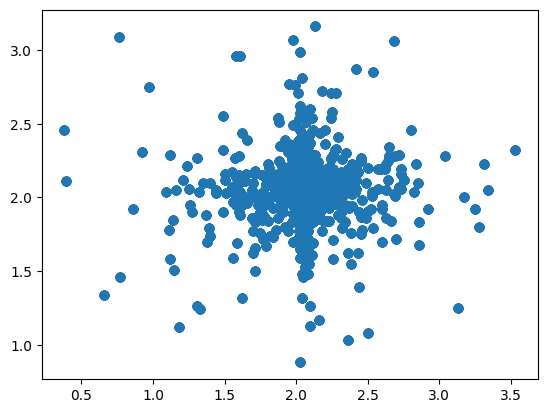

In [51]:
plt.scatter(flattened_data[:, 10], flattened_data[:, 20])

In [52]:
tsne = TSNE(n_components=2)

In [53]:
# Sử dụng T-SNE để giảm chiều dữ liệu xuống 2 chiều
embedded_data = tsne.fit_transform(data)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# Trực quan hóa dữ liệu đã được giảm chiều
plt.scatter(embedded_data[:,0], embedded_data[:,1])
plt.title("T-SNE Visualization")
plt.show()